In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")

# Load Data
def load_data():
    customers = pd.read_csv("C:/Users/Sai Kumar Rudrakshi/Downloads/Customers.csv")
    products = pd.read_csv("C:/Users/Sai Kumar Rudrakshi/Downloads/Products.csv")
    transactions = pd.read_csv("C:/Users/Sai Kumar Rudrakshi/Downloads/Transactions.csv")
    return customers, products, transactions

customers, products, transactions = load_data()

In [6]:
# Data Cleaning for Customers
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
customers = customers.drop_duplicates()
customers = customers.dropna()  # Remove rows with missing values

In [7]:
# Data Cleaning for Products
products = products.drop_duplicates()
products = products.dropna()
products["Price"] = pd.to_numeric(products["Price"], errors="coerce")
products = products.dropna()  # Remove rows with invalid price values

In [8]:
# Data Cleaning for Transactions
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])
transactions = transactions.drop_duplicates()
transactions["Price"] = pd.to_numeric(transactions["Price"], errors="coerce")
transactions["TotalValue"] = pd.to_numeric(transactions["TotalValue"], errors="coerce")
transactions["Quantity"] = pd.to_numeric(transactions["Quantity"], errors="coerce")
transactions = transactions.dropna()  # Remove rows with invalid numerical values

In [9]:
# Detect and handle outliers in Transactions (e.g., extreme TotalValue or Quantity)
q1 = transactions["TotalValue"].quantile(0.25)
q3 = transactions["TotalValue"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
transactions = transactions[
    (transactions["TotalValue"] >= lower_bound) & (transactions["TotalValue"] <= upper_bound)
]


In [ ]:
customers.info()

In [ ]:
products.info()

In [ ]:
transactions.info()

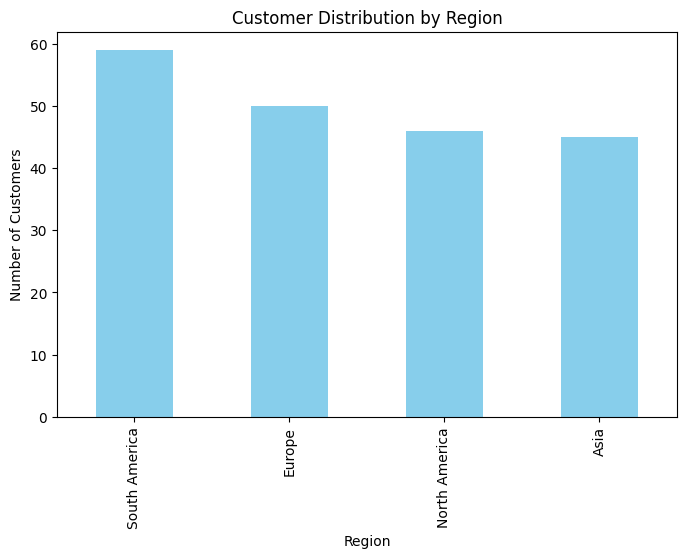

Top 5 Selling Products:
  ProductID            ProductName     Category   Price  Quantity
0      P029     TechPro Headphones  Electronics  433.64        45
1      P048       TechPro Cookbook        Books  416.40        43
2      P054     SoundWave Cookbook        Books   57.30        46
3      P057  ActiveWear Smartphone  Electronics  239.70        43
4      P059        SoundWave Jeans     Clothing  303.20        46


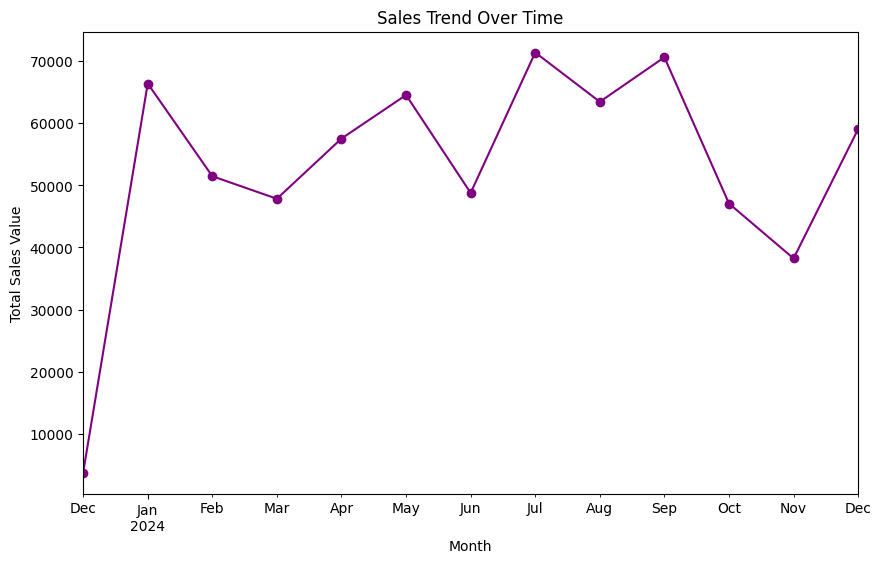

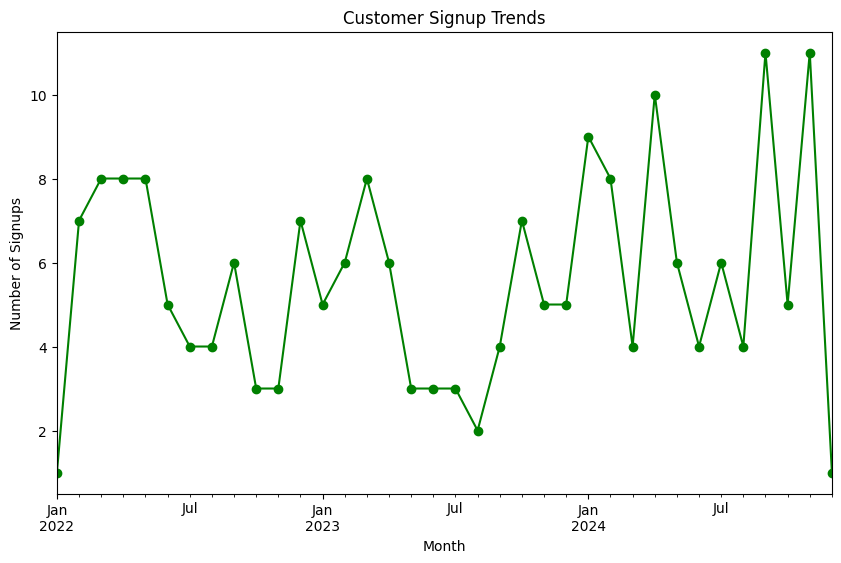

In [10]:
# TASK 1: EDA and Business Insights
def perform_eda(customers, products, transactions):
    # Customer Distribution by Region
    region_distribution = customers["Region"].value_counts()
    plt.figure(figsize=(8, 5))
    region_distribution.plot(kind="bar", color="skyblue")
    plt.title("Customer Distribution by Region")
    plt.ylabel("Number of Customers")
    plt.xlabel("Region")
    plt.show()

    # Top 5 Selling Products
    top_products = (
        transactions.groupby("ProductID")["Quantity"]
        .sum()
        .sort_values(ascending=False)
        .head(5)
    )
    top_products_names = products[products["ProductID"].isin(top_products.index)]
    print("Top 5 Selling Products:")
    print(top_products_names.merge(top_products, on="ProductID"))

    # Sales Trend Over Time
    transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])
    sales_trend = transactions.groupby(transactions["TransactionDate"].dt.to_period("M"))[
        "TotalValue"
    ].sum()
    plt.figure(figsize=(10, 6))
    sales_trend.plot(kind="line", marker="o", color="purple")
    plt.title("Sales Trend Over Time")
    plt.ylabel("Total Sales Value")
    plt.xlabel("Month")
    plt.show()

    # Signup Trends
    customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
    signup_trends = customers.groupby(customers["SignupDate"].dt.to_period("M"))[
        "CustomerID"
    ].count()
    plt.figure(figsize=(10, 6))
    signup_trends.plot(kind="line", marker="o", color="green")
    plt.title("Customer Signup Trends")
    plt.ylabel("Number of Signups")
    plt.xlabel("Month")
    plt.show()

perform_eda(customers, products, transactions)
